In [1]:
import numpy as np
from skimage.io import imread, imshow
from skimage import color
%matplotlib inline

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


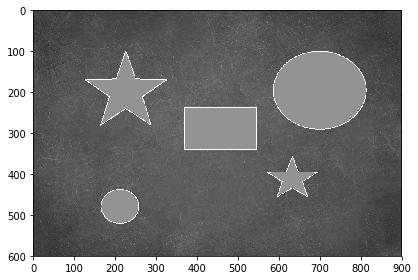

In [16]:
img = color.rgb2gray(imread('cv2.png'))
imshow(img)

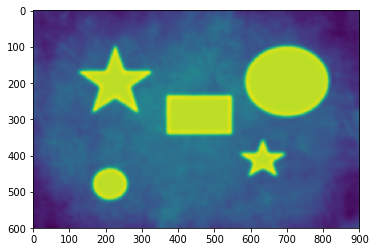

In [32]:
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Gaussian
img_blur = ndi.gaussian_filter(img, 5)
plt.figure()
plt.imshow(img_blur)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


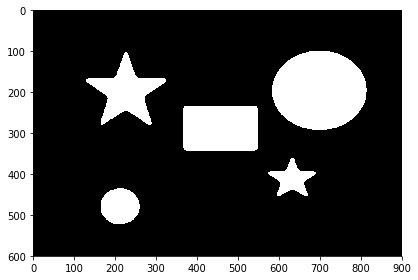

In [39]:
binary = (img_blur>0.5)
imshow(binary)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


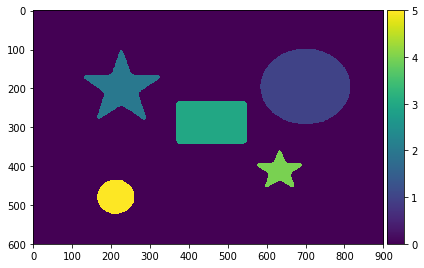

In [68]:
from skimage.measure import label, regionprops

color_img = label(binary)
imshow(color_img)

35148   44814   1.2750085353362923
14102   34905   2.4751808254148346
19892   20130   1.0119646088879952
4922   11020   2.238927265339293
6590   8360   1.2685887708649468


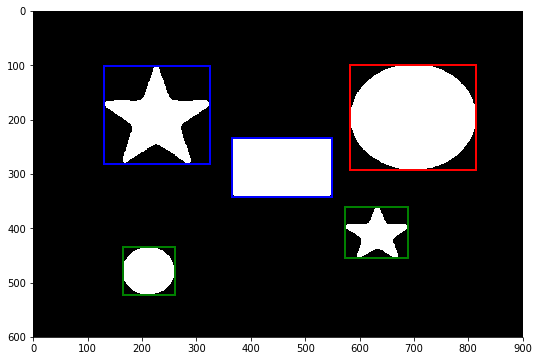

In [90]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(binary, cmap='gray')

for region in regionprops(color_img):
    if region.area > 30000 :
        minr, minc, maxr, maxc = region.bbox        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
    elif region.area > 10000 :
        minr, minc, maxr, maxc = region.bbox        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='blue', linewidth=2)
        ax.add_patch(rect)
    else:
        minr, minc, maxr, maxc = region.bbox        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='green', linewidth=2)
        ax.add_patch(rect)
    print(region.area, " ", (maxr-minr)*(maxc-minc), " ", (maxr-minr)*(maxc-minc)/region.area)

35148   44814   1.2750085353362923
14102   34905   2.4751808254148346
19892   20130   1.0119646088879952
4922   11020   2.238927265339293
6590   8360   1.2685887708649468


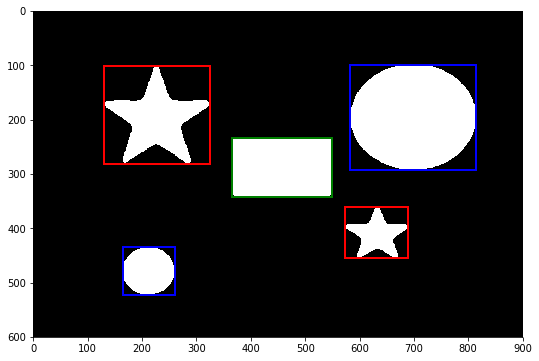

In [105]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(binary, cmap='gray')

for region in regionprops(color_img):
    minr, minc, maxr, maxc = region.bbox        
    ratio = (maxr-minr)*(maxc-minc)/region.area
    print(region.area, " ", (maxr-minr)*(maxc-minc), " ", ratio)
    
    if ratio > 2.0 :
        minr, minc, maxr, maxc = region.bbox        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
    elif ratio > 1.2 :
        minr, minc, maxr, maxc = region.bbox        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='blue', linewidth=2)
        ax.add_patch(rect)
    else:
        minr, minc, maxr, maxc = region.bbox        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='green', linewidth=2)
        ax.add_patch(rect)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(binary, cmap='gray')

for region in regionprops(color_img):
    minr, minc, maxr, maxc = region.bbox        
    ratio = (maxr-minr)*(maxc-minc)/region.area
    ratio = region.extent
    print(region.area, " ", (maxr-minr)*(maxc-minc), " ", ratio)
    
    if ratio > 2.0 :
        minr, minc, maxr, maxc = region.bbox        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
    elif ratio > 1.2 :
        minr, minc, maxr, maxc = region.bbox        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='blue', linewidth=2)
        ax.add_patch(rect)
    else:
        minr, minc, maxr, maxc = region.bbox        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='green', linewidth=2)
        ax.add_patch(rect)